# E9 241 Digital Image Processing - Assignment 2
***
*Submitted by: Dwaipayan Haldar*<br>
*S.R. No. : 27128*

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve

from src.P01_spatial_filter import *
from src.P02_geometric_operation import *

## Problem 1: Spatial Filtering and Binarization

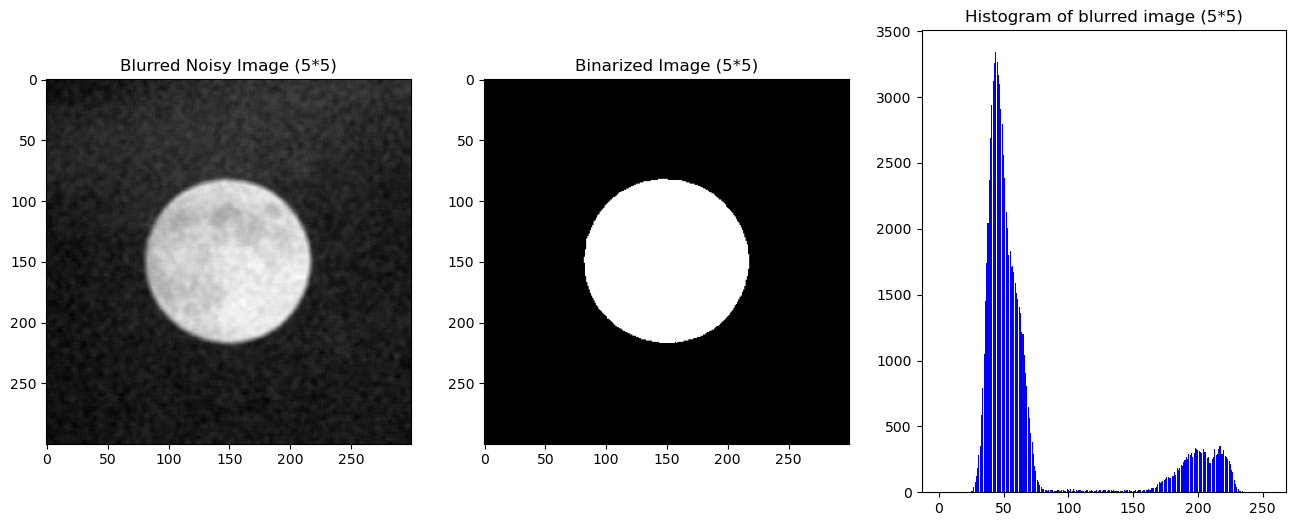

The optimal within class variance is: 158.0067515348846
Optimal Threshold:125


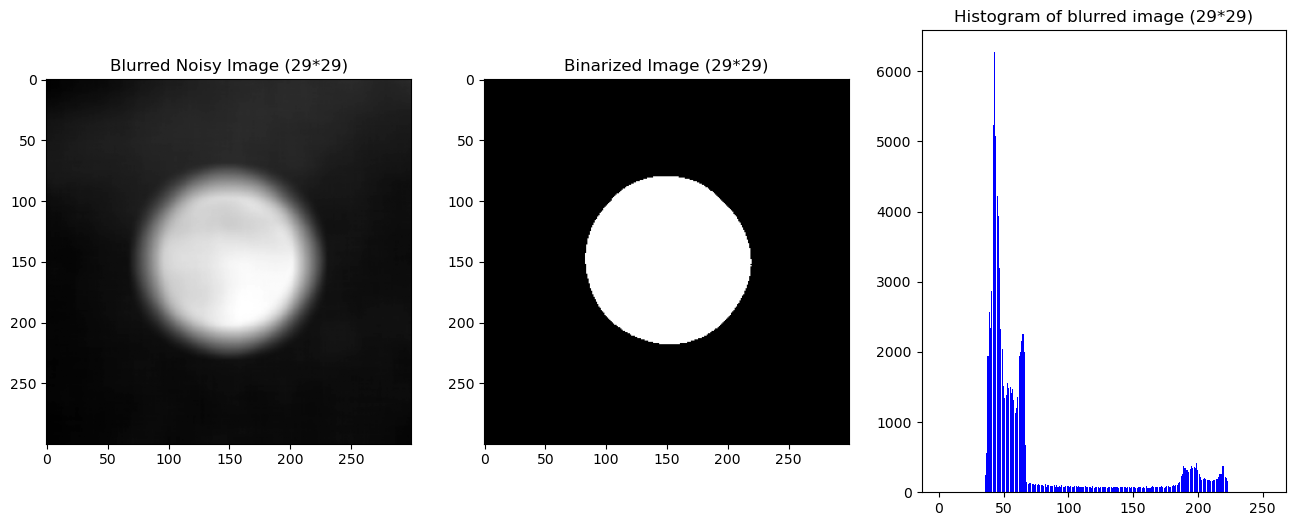

The optimal within class variance is: 279.3946591736916
Optimal Threshold:119


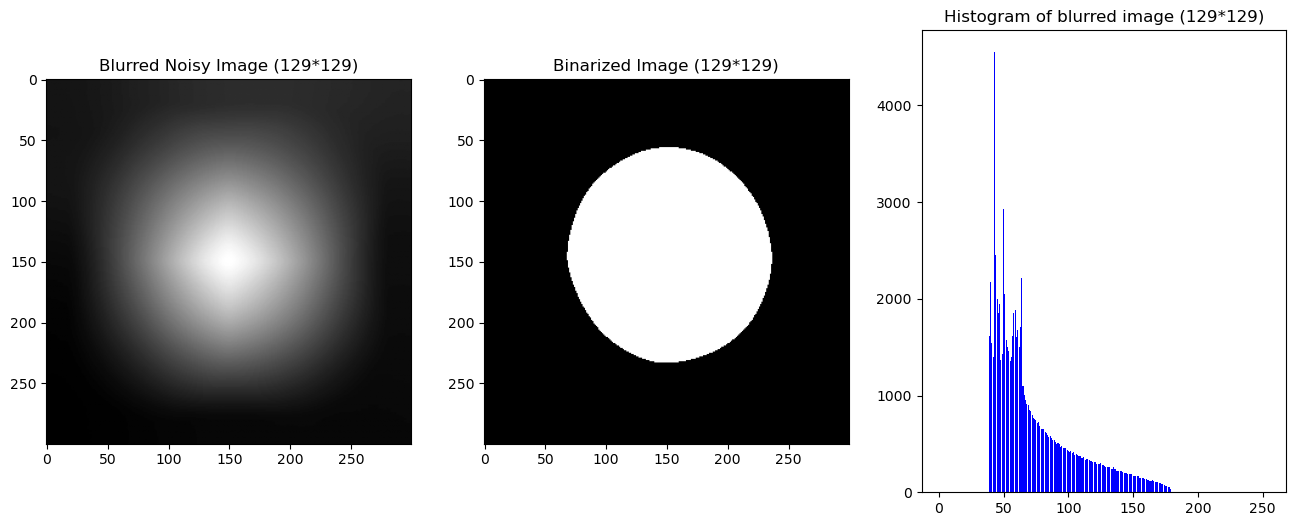

The optimal within class variance is: 268.89033785151594
Optimal Threshold:89


In [2]:
img = skimage.io.imread('images/moon_noisy.png')
img_gray = skimage.color.rgb2gray(img)
img_gray = (img_gray*255).astype(np.uint8)

def plt_binarized_image(box_size):
    kernel = box_kernel(box_size)

    convolved_img = convolve(img_gray, kernel)
    binarized_img, opt_wthn_variance, thresh = otsu_within_class(convolved_img)

    plt.figure(figsize=(16,6))
    plt.subplot(1,3,1)
    plt.title(f'Blurred Noisy Image ({box_size}*{box_size})')
    plt.imshow(convolved_img, cmap='gray')
    plt.subplot(1,3,2)
    plt.title(f'Binarized Image ({box_size}*{box_size})')
    plt.imshow(binarized_img, cmap='gray')
    plt.subplot(1,3,3)
    plt.title(f'Histogram of blurred image ({box_size}*{box_size})')
    plt.bar(range(256), histogram(convolved_img), color = 'blue')
    plt.show()

    print(f'The optimal within class variance is: {opt_wthn_variance}')
    print(f'Optimal Threshold:{thresh}')

for box_size in [5,29,129]:
    plt_binarized_image(box_size)


## Problem 2: Scaling and Rotation with Interpolation

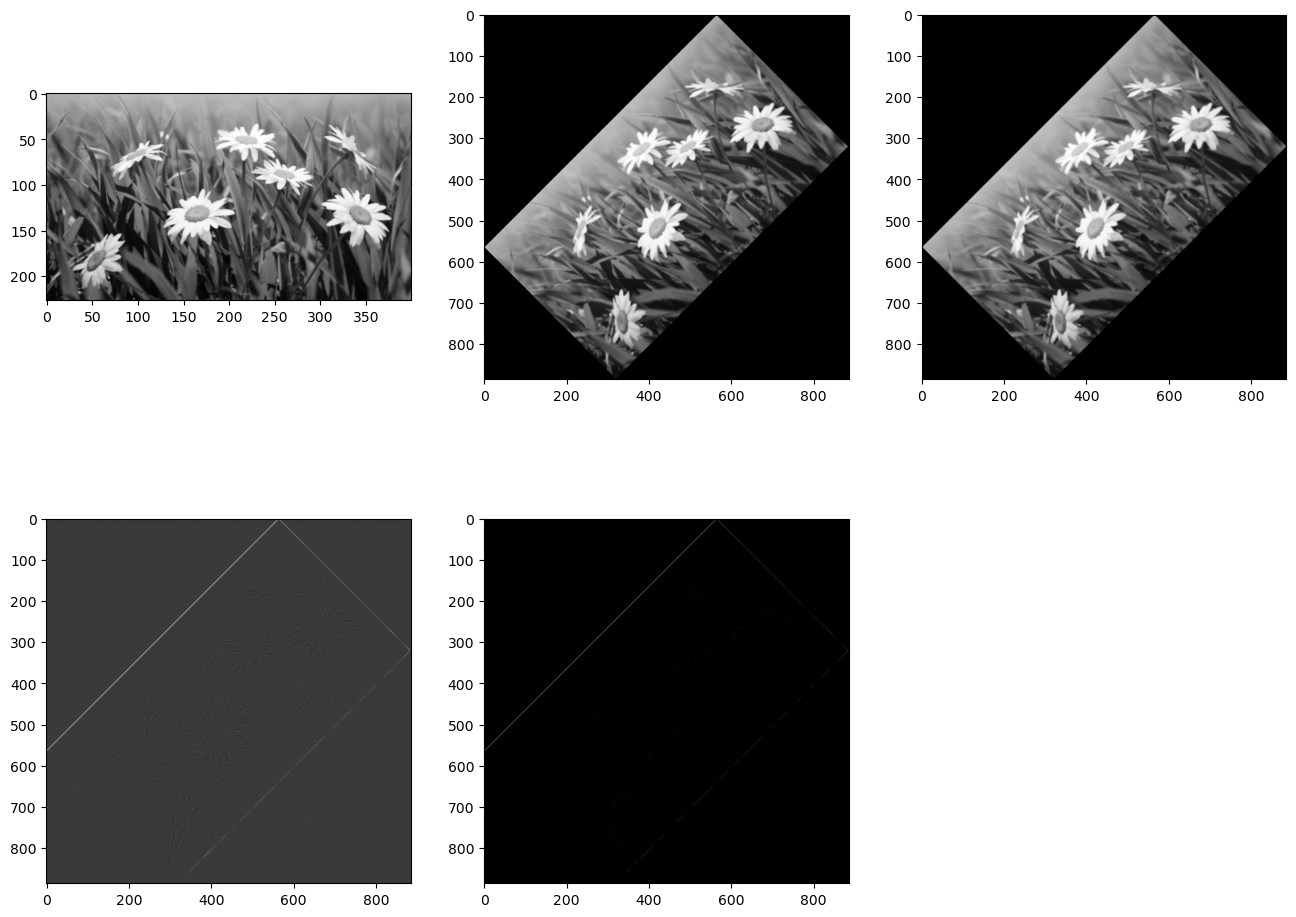

In [6]:
img_flowers = skimage.io.imread('images/flowers.png')
upscaled_img = upscale(img_flowers)
rotated_upscaled_image = rotate_image(upscaled_img, np.pi/4)

rotated_image = rotate_image(img_flowers, np.pi/4)
upscaled_rotated_image = upscale(rotated_image)

diff = upscaled_rotated_image - rotated_upscaled_image

plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.imshow(img_flowers, cmap= 'gray')
plt.subplot(2,3,2)
plt.imshow(rotated_upscaled_image, cmap = 'gray')
plt.subplot(2,3,3)
plt.imshow(upscaled_rotated_image, cmap='gray')
plt.subplot(2,3,4)
plt.imshow(diff, cmap='gray')
plt.subplot(2,3,5)
plt.imshow(diff, vmin=0, vmax=255, cmap='gray')
plt.show()